In [ ]:
# # libraries (do not import additional libraries)
# import keras
# from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential, load_model
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.callbacks import ModelCheckpoint
# import math
# import matplotlib.pyplot as plt

# # parameters for this script
# batch_size = 32
# num_classes = 10
# epochs = 20
# data_augmentation = False

# # Load the data, split between train and test sets:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # Convert class vectors to binary class matrices.
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# # Define a convolutional neural network
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# # initiate RMSprop optimizer
# opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# # Compile the model before using it
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])
# print(model.summary())

# # normalize the data
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# # partition training set into training and validation set
# x_validate = x_train[40000:,:]
# x_train = x_train[:40000,:]
# y_validate = y_train[40000:,:]
# y_train = y_train[:40000,:]

# # create a callback that will save the best model while training
# save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# # train without data augmentation
# if not data_augmentation:
#     print('Not using data augmentation.')
#     history = model.fit(x_train, y_train,
#                         batch_size=batch_size,
#                         epochs=epochs,
#                         validation_data=(x_validate, y_validate),
#                         shuffle=True,
#                         callbacks=[save_best_model])

# # train with data augmentation
# else:
#     print('Using real-time data augmentation.')
#     # This will do preprocessing and realtime data augmentation:
#     datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.1,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.1,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)

#     # Compute quantities required for feature-wise normalization
#     # (std, mean, and principal components if ZCA whitening is applied).
#     datagen.fit(x_train)

#     # Fit the model on the batches generated by datagen.flow().
#     history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
#                         steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
#                         epochs=epochs,
#                         validation_data=(x_validate, y_validate),
#                         callbacks=[save_best_model])
    
# # Plot training accuracy
# plt.plot(history.history['accuracy'])
# plt.title('training accuracy')
# plt.ylabel('training accuracy')
# plt.xlabel('epoch')
# plt.legend(['Conv'], loc='upper left')
# plt.show()

# # Plot validation accuracy
# plt.plot(history.history['val_accuracy'])
# plt.title('validation accuracy')
# plt.ylabel('validation accuracy')
# plt.xlabel('epoch')
# plt.legend(['Conv'], loc='upper left')
# plt.show()

# # Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
# saved_model = load_model('best_model.h5')
# scores = saved_model.evaluate(x_test, y_test, verbose=1)
# print('Test accuracy:', scores[1])

In [ ]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
def a():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
  model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
  
  print(model.summary())

  models = []
  for i in range(5):
    m = Sequential()
    m.add(Flatten())
    for j in range(i):
      m.add(Dense(512))
      m.add(Activation('relu'))
      m.add(Dropout(0.5))
    m.add(Dense(num_classes))
    m.add(Activation('softmax'))
    m.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    models.append(m)
  
  best_conv_model = ModelCheckpoint('best_conv_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  best_sdm_models = [ModelCheckpoint('best_sdm_'+str(i)+'_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1) for i in range(5)]
  print('Not using data augmentation.')
  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_validate, y_validate),
                      shuffle=True,
                      callbacks=[best_conv_model])
  histories = []
  for i in range(5):
    h = models[i].fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_validate, y_validate),
                  shuffle=True,
                  callbacks=[best_sdm_models[i]])
    histories.append(h)
    
  # Plot training accuracy
  plt.plot(history.history['accuracy'])
  for h in histories:
    plt.plot(h.history['accuracy'])
  plt.title('training accuracy')
  plt.ylabel('training accuracy')
  plt.xlabel('epoch')
  plt.legend(['Conv','0 hidden layer', '1 hidden layer', '2 hidden layers', '3 hidden layers', '4 hidden layers'], loc='upper left')
  plt.show()
  plt.clf()

  # Plot validation accuracy
  plt.plot(history.history['val_accuracy'])
  for h in histories:
    plt.plot(h.history['val_accuracy'])
  plt.title('validation accuracy')
  plt.ylabel('validation accuracy')
  plt.xlabel('epoch')
  plt.legend(['Conv','0 hidden layer', '1 hidden layer', '2 hidden layers', '3 hidden layers', '4 hidden layers'], loc='upper left')
  plt.show()

  # Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
  saved_model = load_model('best_conv_model1.h5')
  scores = saved_model.evaluate(x_test, y_test, verbose=1)
  print('Test accuracy:', scores[1])
  for i in range(5):
    del saved_model
    saved_model = load_model('best_sdm_'+str(i)+'_model1.h5')
    scores = saved_model.evaluate(x_test, y_test, verbose=1)
    print('Test accuracy:', scores[1])

def b():
  history = []
  relu_neural_model = Sequential()
  relu_neural_model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  relu_neural_model.add(Activation('relu'))
  relu_neural_model.add(Conv2D(32, (3, 3), padding='same'))
  relu_neural_model.add(Activation('relu'))
  relu_neural_model.add(MaxPooling2D(pool_size=(2, 2)))
  relu_neural_model.add(Dropout(0.25))
  relu_neural_model.add(Conv2D(64, (3, 3), padding='same'))
  relu_neural_model.add(Activation('relu'))
  relu_neural_model.add(Conv2D(64, (3, 3), padding='same'))
  relu_neural_model.add(Activation('relu'))
  relu_neural_model.add(MaxPooling2D(pool_size=(2, 2)))
  relu_neural_model.add(Dropout(0.25))
  relu_neural_model.add(Flatten())
  relu_neural_model.add(Dense(512))
  relu_neural_model.add(Activation('relu'))
  relu_neural_model.add(Dropout(0.5))
  relu_neural_model.add(Dense(num_classes))
  relu_neural_model.add(Activation('softmax'))
  best_relu_model = ModelCheckpoint('best_relu_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  relu_neural_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  print('Not using data augmentation.')
  h = relu_neural_model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_validate, y_validate),
                shuffle=True,
                callbacks=[best_relu_model])
  history.append(h)

  sigmoid_neural_model = Sequential()
  sigmoid_neural_model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  sigmoid_neural_model.add(Activation('sigmoid'))
  sigmoid_neural_model.add(Conv2D(32, (3, 3), padding='same'))
  sigmoid_neural_model.add(Activation('sigmoid'))
  sigmoid_neural_model.add(MaxPooling2D(pool_size=(2, 2)))
  sigmoid_neural_model.add(Dropout(0.25))
  sigmoid_neural_model.add(Conv2D(64, (3, 3), padding='same'))
  sigmoid_neural_model.add(Activation('sigmoid'))
  sigmoid_neural_model.add(Conv2D(64, (3, 3), padding='same'))
  sigmoid_neural_model.add(Activation('sigmoid'))
  sigmoid_neural_model.add(MaxPooling2D(pool_size=(2, 2)))
  sigmoid_neural_model.add(Dropout(0.25))
  sigmoid_neural_model.add(Flatten())
  sigmoid_neural_model.add(Dense(512))
  sigmoid_neural_model.add(Activation('sigmoid'))
  sigmoid_neural_model.add(Dropout(0.5))
  sigmoid_neural_model.add(Dense(num_classes))
  sigmoid_neural_model.add(Activation('softmax'))
  best_sigmoid_model = ModelCheckpoint('best_sigmoid_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  sigmoid_neural_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  print('Not using data augmentation.')
  h = sigmoid_neural_model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_validate, y_validate),
                shuffle=True,
                callbacks=[best_sigmoid_model])
  history.append(h)

  plt.plot(history[0].history['accuracy'])
  plt.plot(history[1].history['accuracy'])
  plt.title('training accuracy')
  plt.ylabel('training accuracy')
  plt.xlabel('epoch')
  plt.legend(['relu', 'sigmoid'], loc='upper left')
  plt.show()
  plt.clf()

  plt.plot(history[0].history['val_accuracy'])
  plt.plot(history[1].history['val_accuracy'])
  plt.title('validation accuracy')
  plt.ylabel('validation accuracy')
  plt.xlabel('epoch')
  plt.legend(['relu', 'sigmoid'], loc='upper left')
  plt.show()
  plt.clf()

  saved_model = load_model('best_relu_model.h5')
  scores = saved_model.evaluate(x_test, y_test, verbose=1)
  print('Test accuracy:', scores[1])
  del saved_model
  saved_model = load_model('best_sigmoid_model.h5')
  scores = saved_model.evaluate(x_test, y_test, verbose=1)
  print('Test accuracy:', scores[1])

def c():
  epochs = 100
  histories = []
  best_models = []
  i = -1
  for dropout in [True, False]:
    for augmentation in [True, False]:
      i += 1
      model = Sequential()
      model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
      model.add(Activation('relu'))
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      if dropout:
        model.add(Dropout(0.25))

      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      if dropout:
        model.add(Dropout(0.25))

      model.add(Flatten())
      model.add(Dense(512))
      model.add(Activation('relu'))
      if dropout:
        model.add(Dropout(0.5))
      model.add(Dense(num_classes))
      model.add(Activation('softmax'))

      # initiate RMSprop optimizer
      opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

      # Compile the model before using it
      model.compile(loss='categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

      # create a callback that will save the best model while training
      save_best_model = ModelCheckpoint('best_model'+str(i)+'.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
      best_models.append(save_best_model)

      # train without data augmentation
      if not augmentation:
        print('Not using data augmentation.')
        history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=100,
                            validation_data=(x_validate, y_validate),
                            shuffle=True,
                            callbacks=[save_best_model])

      # train with data augmentation
      else:
        print('Using real-time data augmentation.')
        # This will do preprocessing and realtime data augmentation:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

        # Compute quantities required for feature-wise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)

        # Fit the model on the batches generated by datagen.flow().
        history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                            steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                            epochs=100,
                            validation_data=(x_validate, y_validate),
                            callbacks=[save_best_model])
      histories.append(history)

  plt.plot(histories[0].history['accuracy'])
  plt.plot(histories[1].history['accuracy'])
  plt.plot(histories[2].history['accuracy'])
  plt.plot(histories[3].history['accuracy'])
  plt.title('training accuracy')
  plt.ylabel('training accuracy')
  plt.xlabel('epoch')
  plt.legend(['relu_with_dropout_with_augmentation', 'relu_with_dropout_without_augmentation', 'relu_without_dropout_with_augmentation', 'relu_without_dropout_without_augmentation'], loc='upper left')
  plt.show()
  plt.clf()

  plt.plot(histories[0].history['val_accuracy'])
  plt.plot(histories[1].history['val_accuracy'])
  plt.plot(histories[2].history['val_accuracy'])
  plt.plot(histories[3].history['val_accuracy'])
  plt.title('validation accuracy')
  plt.ylabel('validation accuracy')
  plt.xlabel('epoch')
  plt.legend(['relu_with_dropout_with_augmentation', 'relu_with_dropout_without_augmentation', 'relu_without_dropout_with_augmentation', 'relu_without_dropout_without_augmentation'], loc='upper left')
  plt.show()
  plt.clf()

  for i in range(len(best_models)):
    saved_model = load_model('best_model'+str(i)+'.h5')
    scores = saved_model.evaluate(x_test, y_test, verbose=1)
    print('Test accuracy:', scores[1])
    del saved_model

def d():
  epochs = 100
  models = []
  for i in range(3):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    models.append(model)
  best_models = []
  histories = []
  names = ['best_RMSprop_model.h5', 'best_Adagrad_model.h5', 'best_Adam_model.h5']
  opts = [keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), keras.optimizers.Adagrad(), keras.optimizers.Adam()]
  for i, opt in enumerate(opts):
    best_model = ModelCheckpoint(names[i], monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
    models[i].compile(loss='categorical_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy'])
    history = models[i].fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=100,
                            validation_data=(x_validate, y_validate),
                            shuffle=True,
                            callbacks=[best_model])
    best_models.append(best_model)
    histories.append(history)
  
  plt.plot(histories[0].history['accuracy'])
  plt.plot(histories[1].history['accuracy'])
  plt.plot(histories[2].history['accuracy'])
  plt.title('training accuracy')
  plt.ylabel('training accuracy')
  plt.xlabel('epoch')
  plt.legend(['RMSprop_model', 'Adagrad_model', 'Adam_model'], loc='upper left')
  plt.show()
  plt.clf()

  plt.plot(histories[0].history['val_accuracy'])
  plt.plot(histories[1].history['val_accuracy'])
  plt.plot(histories[2].history['val_accuracy'])
  plt.title('validation accuracy')
  plt.ylabel('validation accuracy')
  plt.xlabel('epoch')
  plt.legend(['RMSprop_model', 'Adagrad_model', 'Adam_model'], loc='upper left')
  plt.show()
  plt.clf()

  for i in range(len(best_models)):
    saved_model = load_model(names[i])
    scores = saved_model.evaluate(x_test, y_test, verbose=1)
    print('Test accuracy:', scores[1])
    del saved_model

def e():
  epochs = 100
  histories = []
  best_models = []
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  save_best_model = ModelCheckpoint('best_model_3x3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=100,
                      validation_data=(x_validate, y_validate),
                      shuffle=True,
                      callbacks=[save_best_model])
  histories.append(history)
  
  model5x5 = Sequential()
  model5x5.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
  model5x5.add(Activation('relu'))
  model5x5.add(MaxPooling2D(pool_size=(2, 2)))
  model5x5.add(Dropout(0.25))

  model5x5.add(Conv2D(64, (5, 5), padding='same'))
  model5x5.add(Activation('relu'))
  model5x5.add(MaxPooling2D(pool_size=(2, 2)))
  model5x5.add(Dropout(0.25))

  model5x5.add(Flatten())
  model5x5.add(Dense(512))
  model5x5.add(Activation('relu'))
  model5x5.add(Dropout(0.5))
  model5x5.add(Dense(num_classes))
  model5x5.add(Activation('softmax'))
  model5x5.compile(loss='categorical_crossentropy',
                   optimizer=opt,
                   metrics=['accuracy'])
  save_best_model_5x5 = ModelCheckpoint('best_model_5x5.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  history = model5x5.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=100,
                         validation_data=(x_validate, y_validate),
                         shuffle=True,
                         callbacks=[save_best_model_5x5])
  histories.append(history)

  plt.plot(histories[0].history['accuracy'])
  plt.plot(histories[1].history['accuracy'])
  plt.title('training accuracy')
  plt.ylabel('training accuracy')
  plt.xlabel('epoch')
  plt.legend(['3x3 model', '5x5 model'], loc='upper left')
  plt.show()
  plt.clf()

  plt.plot(histories[0].history['val_accuracy'])
  plt.plot(histories[1].history['val_accuracy'])
  plt.title('validation accuracy')
  plt.ylabel('validation accuracy')
  plt.xlabel('epoch')
  plt.legend(['3x3 model', '5x5 model'], loc='upper left')
  plt.show()
  plt.clf()

  saved_model = load_model('best_model_3x3.h5')
  scores = saved_model.evaluate(x_test, y_test, verbose=1)
  print('Test accuracy:', scores[1])
  del saved_model
  saved_model = load_model('best_model_5x5.h5')
  scores = saved_model.evaluate(x_test, y_test, verbose=1)
  print('Test accuracy:', scores[1])











### **Part 1:**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

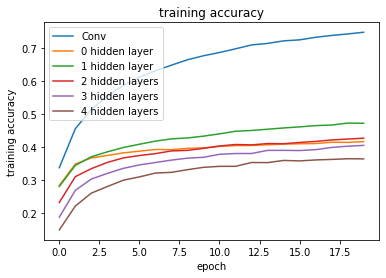

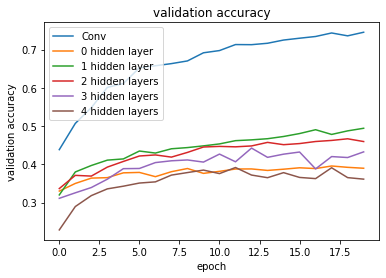

313/313 [==============================] - 1s 3ms/step - loss: 0.7647 - accuracy: 0.7409
Test accuracy: 0.7408999800682068
313/313 [==============================] - 1s 2ms/step - loss: 1.7482 - accuracy: 0.3886
Test accuracy: 0.3885999917984009
313/313 [==============================] - 1s 2ms/step - loss: 1.4565 - accuracy: 0.4898
Test accuracy: 0.48980000615119934
313/313 [==============================] - 1s 2ms/step - loss: 1.5193 - accuracy: 0.4708
Test accuracy: 0.4708000123500824
313/313 [==============================] - 1s 2ms/step - loss: 1.6464 - accuracy: 0.4431
Test accuracy: 0.4431000053882599
313/313 [==============================] - 1s 3ms/step - loss: 1.7653 - accuracy: 0.3951
Test accuracy: 0.3950999975204468


In [ ]:
a()

CNN model perform better than SDNN models with 0,1,2,3,4 layers. Although 20 epochs is not sufficient to reach convergence, it is sufficient to see the trend. Suppose we have more epochs, adding more layers of SDNN models should increase the training accuracy. CNN has pooling layers, alternation of convolution, parameter sharing and locally equivalent representation, which could all result in better accuracy. Also, CNN need less space.

### **Part 2**

Not using data augmentation.
Epoch 1/20
1246/1250 [============================>.] - ETA: 0s - loss: 1.8532 - accuracy: 0.3271
Epoch 00001: val_accuracy improved from -inf to 0.43870, saving model to best_relu_model.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8521 - accuracy: 0.3274 - val_loss: 1.5515 - val_accuracy: 0.4387
Epoch 2/20
1245/1250 [============================>.] - ETA: 0s - loss: 1.5136 - accuracy: 0.4544
Epoch 00002: val_accuracy improved from 0.43870 to 0.51910, saving model to best_relu_model.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5135 - accuracy: 0.4545 - val_loss: 1.3638 - val_accuracy: 0.5191
Epoch 3/20
1250/1250 [==============================] - ETA: 0s - loss: 1.3581 - accuracy: 0.5104
Epoch 00003: val_accuracy improved from 0.51910 to 0.55200, saving model to best_relu_model.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3581 - accuracy: 0.5104 - val_loss: 1.2583 - val_accuracy: 0.5

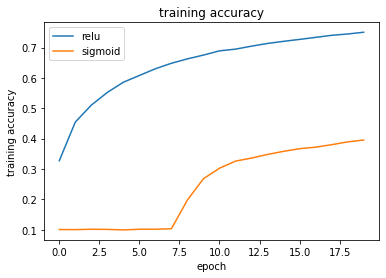

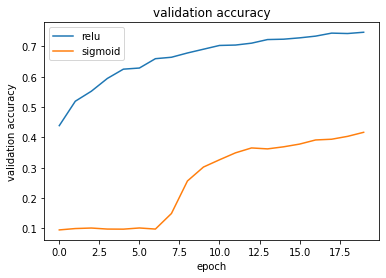

313/313 [==============================] - 1s 3ms/step - loss: 0.7576 - accuracy: 0.7375
Test accuracy: 0.737500011920929
313/313 [==============================] - 1s 3ms/step - loss: 1.6106 - accuracy: 0.4314
Test accuracy: 0.43140000104904175


<Figure size 432x288 with 0 Axes>

In [ ]:
b()

ReLU model performs better than Sigmoid model. ReLU model could reduce the likelihood of vanishing gradient which will result in better accuracy.

### **Part 3**

Using real-time data augmentation.
Epoch 1/100
1248/1250 [============================>.] - ETA: 0s - loss: 1.8885 - accuracy: 0.3089
Epoch 00001: val_accuracy improved from -inf to 0.41960, saving model to best_model0.h5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.8881 - accuracy: 0.3090 - val_loss: 1.6326 - val_accuracy: 0.4196
Epoch 2/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.6036 - accuracy: 0.4142
Epoch 00002: val_accuracy improved from 0.41960 to 0.50310, saving model to best_model0.h5
1250/1250 [==============================] - 22s 17ms/step - loss: 1.6034 - accuracy: 0.4142 - val_loss: 1.3867 - val_accuracy: 0.5031
Epoch 3/100
1248/1250 [============================>.] - ETA: 0s - loss: 1.4603 - accuracy: 0.4718
Epoch 00003: val_accuracy improved from 0.50310 to 0.54730, saving model to best_model0.h5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.4605 - accuracy: 0.4718 - val_loss: 1.2778 - val_accuracy: 

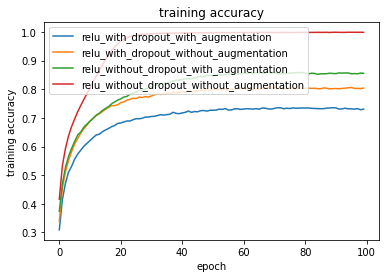

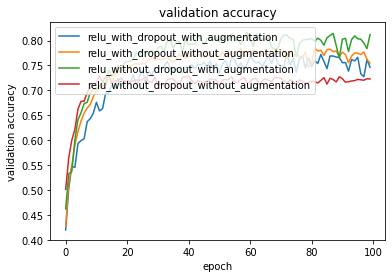

313/313 [==============================] - 1s 3ms/step - loss: 0.7169 - accuracy: 0.7647
Test accuracy: 0.7646999955177307
313/313 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.7801
Test accuracy: 0.7800999879837036
313/313 [==============================] - 1s 3ms/step - loss: 0.6150 - accuracy: 0.8072
Test accuracy: 0.807200014591217
313/313 [==============================] - 1s 3ms/step - loss: 0.9446 - accuracy: 0.7218
Test accuracy: 0.7218000292778015


<Figure size 432x288 with 0 Axes>

In [ ]:
c()

The model without dropout and without data augmentation has the highest training accuracy comparing with other models. Since it will overfitting, the training data accuracy will be higher than other models, while the validation accuracy will become worse than other models when the number of epochs increase due to overfitting.

The model with only data augmentation has higher training accuracy and validation accuracy than the model with only dropout. Since dropout drops part of the network and data augmentation modifies the data's orientation and position.

The model with both data augmentation and dropout perform worse than the model with only one of them applied. This is because applying both data augmentation and dropout might cause underfitting which will also bring down the accuracy.

### **Part 4**

Epoch 1/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.8633 - accuracy: 0.3215
Epoch 00001: val_accuracy improved from -inf to 0.43520, saving model to best_RMSprop_model.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8626 - accuracy: 0.3218 - val_loss: 1.6011 - val_accuracy: 0.4352
Epoch 2/100
1243/1250 [============================>.] - ETA: 0s - loss: 1.5375 - accuracy: 0.4462
Epoch 00002: val_accuracy improved from 0.43520 to 0.49620, saving model to best_RMSprop_model.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5365 - accuracy: 0.4464 - val_loss: 1.4169 - val_accuracy: 0.4962
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 1.3775 - accuracy: 0.5062
Epoch 00003: val_accuracy improved from 0.49620 to 0.54540, saving model to best_RMSprop_model.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3775 - accuracy: 0.5062 - val_loss: 1.2928 - val_accuracy: 0.5454
Epoch 4/100
1

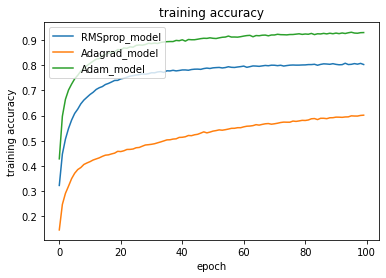

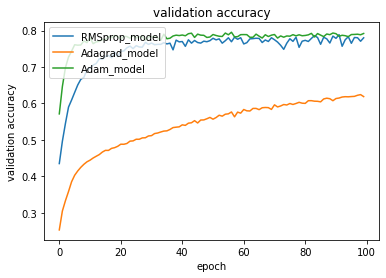

313/313 [==============================] - 1s 3ms/step - loss: 0.6672 - accuracy: 0.7832
Test accuracy: 0.7832000255584717
313/313 [==============================] - 1s 3ms/step - loss: 1.0776 - accuracy: 0.6221
Test accuracy: 0.6220999956130981
313/313 [==============================] - 1s 3ms/step - loss: 0.8619 - accuracy: 0.7776
Test accuracy: 0.7775999903678894


<Figure size 432x288 with 0 Axes>

In [ ]:
d()

Adam performs the best among three models, and Adagrad performs the worst. The Adagrad has the cons of radical diminishing learning rate while the other two models could resolve this problem. In other words, RMSprop optimization method and Adam optimization are improved version of Adagrad optimization method with radiacl diminishing learning rate problem resolved.

### **Part 5**

Epoch 1/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.8514 - accuracy: 0.3255
Epoch 00001: val_accuracy improved from -inf to 0.43860, saving model to best_model_3x3.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8506 - accuracy: 0.3259 - val_loss: 1.5778 - val_accuracy: 0.4386
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 1.5171 - accuracy: 0.4552
Epoch 00002: val_accuracy improved from 0.43860 to 0.50880, saving model to best_model_3x3.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5171 - accuracy: 0.4552 - val_loss: 1.3748 - val_accuracy: 0.5088
Epoch 3/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.3739 - accuracy: 0.5029
Epoch 00003: val_accuracy improved from 0.50880 to 0.52690, saving model to best_model_3x3.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3739 - accuracy: 0.5030 - val_loss: 1.3462 - val_accuracy: 0.5269
Epoch 4/100
1249/1250 [==

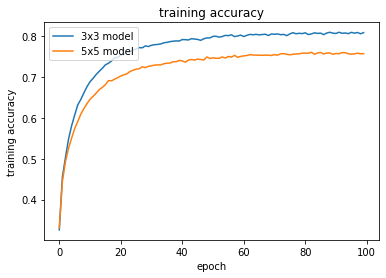

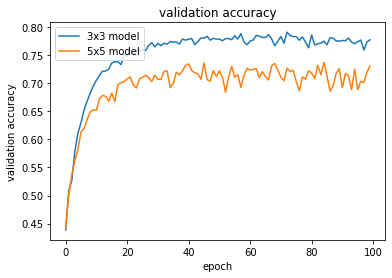

313/313 [==============================] - 1s 3ms/step - loss: 0.6786 - accuracy: 0.7825
Test accuracy: 0.7825000286102295
313/313 [==============================] - 1s 3ms/step - loss: 0.9266 - accuracy: 0.7336
Test accuracy: 0.7336000204086304


<Figure size 432x288 with 0 Axes>

In [ ]:
e()

The 3x3 model performs better than the 5x5 model on both training accuracy and validation accuracy. In conclusion, smaller layer with deeper neural network perform better than larger layer with shallower nerual network on image classification. Smaller layer with deeper neural network is more expressive on image classification. Larger layers need more computational power. With the same computational power, smaller layer which is smaller filter will result in less parameters which need less computationality to construct a deeper neural network, which could lead to a better performance on accuracy of image classification.